In [1]:
%matplotlib inline

import datetime
from collections import namedtuple, Counter, defaultdict

import matplotlib.pyplot as plt


observation = namedtuple('observation', ['mac', 'rssi', 'timestamp', 'main_group', 'sub_group'])

def make_observation(items):
    return observation(
        items[0],
        int(items[1]),
        datetime.datetime.fromtimestamp(float(items[2])),
        int(items[3]),
        int(items[4])
    )

with open('2017_6_3.dat') as f:
    observations = [make_observation(line.split(',')) for line in f]

obs = observations

In [2]:
obs[0]

observation(mac='cc:3a:61:d5:cb:c4', rssi=-72, timestamp=datetime.datetime(2017, 6, 3, 14, 18, 21, 570000), main_group=0, sub_group=4)

In [3]:
min_date = min(o.timestamp for o in obs)
max_date = max(o.timestamp for o in obs)

min_date, max_date

(datetime.datetime(2017, 6, 3, 14, 18, 21, 570000),
 datetime.datetime(2017, 6, 4, 20, 21, 53, 410000))

In [4]:
obs_per_second = Counter(int((o.timestamp - min_date).total_seconds()) for o in obs)
obs_per_second

Counter({0: 4,
         2: 5,
         3: 12,
         4: 26,
         5: 16,
         6: 8,
         8: 13,
         9: 7,
         10: 6,
         11: 8,
         13: 27,
         14: 18,
         16: 4,
         17: 14,
         18: 14,
         19: 18,
         76815: 1,
         21: 22,
         22: 16,
         24: 12,
         25: 7,
         26: 46,
         27: 1,
         28: 8,
         30: 9,
         32: 28,
         33: 10,
         34: 20,
         35: 8,
         36: 11,
         40: 7,
         41: 18,
         42: 28,
         43: 5,
         44: 5,
         45: 5,
         47: 8,
         48: 7,
         49: 9,
         50: 3,
         51: 12,
         52: 33,
         53: 1,
         54: 14,
         55: 2,
         56: 33,
         57: 11,
         58: 6,
         59: 4,
         60: 13,
         61: 13,
         62: 25,
         63: 3,
         64: 8,
         65: 3,
         66: 7,
         65603: 7,
         68: 21,
         69: 1,
         70: 1,
         71: 2

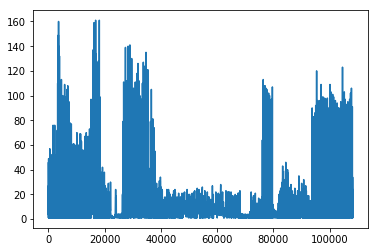

In [5]:
plot_obs_per_second = plt.plot(obs_per_second.keys(), obs_per_second.values())

In [6]:
min_rssi = min(o.rssi for o in obs)
max_rssi = max(o.rssi for o in obs)

min_rssi, max_rssi

(-121, -3)

In [7]:
rssis = Counter(o.rssi for o in obs)
rssis

Counter({-121: 1,
         -120: 2,
         -119: 2,
         -118: 3,
         -117: 1,
         -115: 3,
         -114: 1,
         -113: 2,
         -112: 3,
         -111: 3,
         -110: 2,
         -109: 1,
         -108: 2,
         -106: 7,
         -105: 2,
         -104: 4,
         -103: 8,
         -102: 8,
         -101: 12,
         -100: 13,
         -99: 11,
         -98: 12,
         -97: 10,
         -96: 14,
         -95: 19,
         -94: 26,
         -93: 32,
         -92: 40,
         -91: 47,
         -90: 52,
         -89: 70,
         -88: 76,
         -87: 120,
         -86: 158,
         -85: 198,
         -84: 249,
         -83: 315,
         -82: 414,
         -81: 464,
         -80: 680,
         -79: 894,
         -78: 1229,
         -77: 1599,
         -76: 2290,
         -75: 3051,
         -74: 4432,
         -73: 6411,
         -72: 10127,
         -71: 16785,
         -70: 25423,
         -69: 25337,
         -68: 19504,
         -67: 15113,
     

(0, 15000)

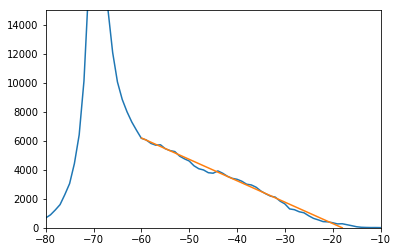

In [8]:
plot_rssi_distribution = plt.plot(rssis.keys(), rssis.values(), [-60, -18], [6200, 0])
plt.gca().set_xlim([-80, -10]) #([-60, -15])
plt.gca().set_ylim([0, 15000]) #([0, 6500])

In [9]:
groups = Counter((o.main_group, o.sub_group) for o in obs)
groups

Counter({(0, 0): 119, (0, 2): 9, (0, 4): 319594})

In [10]:
n_unique_macs = len(set(o.mac for o in obs))
n_unique_macs

10415

In [11]:
macs_distribution = Counter(o.mac for o in obs)
macs_distribution.most_common(10)

[('80:7a:bf:3a:74:69', 23890),
 ('78:52:1a:33:dd:fd', 20849),
 ('b0:47:bf:fb:92:8e', 10690),
 ('78:4f:43:8a:60:a8', 10135),
 ('c0:ee:fb:32:5d:04', 5626),
 ('18:3a:2d:c8:09:40', 4632),
 ('34:bb:26:d7:24:e4', 4547),
 ('20:a9:0e:79:13:c6', 4371),
 ('50:f0:d3:eb:af:64', 4102),
 ('bc:83:85:25:71:4f', 3896)]

In [12]:
one_hit_wonders = [
    mac for mac in macs_distribution
    if macs_distribution[mac] == 1
]
len(one_hit_wonders)

2668

In [13]:
few_hit_wonders = [
    mac for mac in macs_distribution
    if macs_distribution[mac] <= 5
]
len(few_hit_wonders)

5932

In [14]:
def get_cumul_unique_macs():
    cumul_unique_macs = []
    uniqe_macs = set()
    for o in obs:
        uniqe_macs.add(o.mac)
        cumul_unique_macs.append(len(uniqe_macs))
    return cumul_unique_macs

def get_diffs_unique_macs():
    c = cumul_unique_macs
    return [n1 - n0 for n0, n1 in zip(c[:-1], c[1:])]

In [15]:
cumul_unique_macs = get_cumul_unique_macs()
cumul_unique_macs[-1]

10415

In [16]:
diffs_unique_macs = get_diffs_unique_macs()
diffs_unique_macs[:15]

[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]

In [17]:
t0 = obs[0].timestamp
t0

datetime.datetime(2017, 6, 3, 14, 18, 21, 570000)

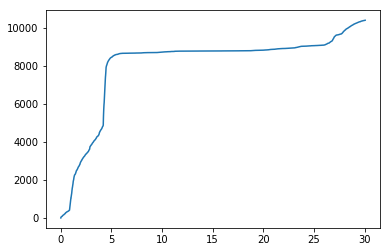

In [18]:
plot_cumul_uniqe_macs = plt.plot(
    [(o.timestamp - t0).total_seconds() / 3600 for o in obs],
    cumul_unique_macs
)

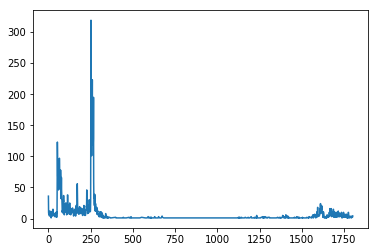

In [19]:
t0 = obs[0].timestamp
macs_minutes = [(o.mac, int((o.timestamp - t0).total_seconds() / 60.0)) for o in obs]

unique_macs = set()
minutes_new_unique_macs = defaultdict(int)
for mac, minute in macs_minutes:
    if not mac in unique_macs:
        minutes_new_unique_macs[minute] += 1
    unique_macs.add(mac)

plot_new_macs_per_minute = plt.plot(minutes_new_unique_macs.keys(), minutes_new_unique_macs.values())

# Extract Manufacturers from MAC address prefixes

In [20]:
manufacturer = namedtuple('manufacturer', ['mac_prefix', 'info'])

def make_manufacturer(line):
    return manufacturer(
        line[:8].strip().lower(),
        ' '.join(line[8:].strip().split())
    )

with open('manuf') as f:
    manufacturers_raw = sorted([
        make_manufacturer(line)
        for line in f
        if line.strip()
        and not line.strip().startswith('#')
    ])

manufacturers = defaultdict(list)
for m_raw in manufacturers_raw:
    manufacturers[m_raw.mac_prefix].append(m_raw.info)

mans = manufacturers

mans

defaultdict(list,
            {'34:23:87': ['HonHaiPr # Hon Hai Precision Ind. Co.,Ltd.'],
             'b0:c2:05': ['Bionime'],
             'd4:52:97': ['Nstreams # nSTREAMS Technologies, Inc.'],
             '00:22:0d': ['Cisco # Cisco Systems, Inc'],
             '88:9c:a6': ['BtbKorea # BTB Korea INC'],
             '74:5f:00': ['SamsungS # Samsung Semiconductor Inc.'],
             '00:14:9c': ['Hf # HF Company'],
             '00:40:93': ['PaxdataN # PAXDATA NETWORKS LTD.'],
             '00:40:92': ['AspCompu # ASP Computer Products, Inc.'],
             '00:40:91': ['ProcompI # Procomp Industria Eletronica'],
             '00:40:90': ['AnselCom # Ansel Communications PC NE2000 compatible twisted-pair ethernet cards'],
             '00:40:97': ['DatexDiv # DATEX DIVISION OF'],
             '00:40:96': ['Aironet # Cisco Systems, Inc.'],
             '00:40:95': ['EagleTec # Eagle Technologies [UMC also reported]'],
             '00:40:94': ['Shograph # Shographics Inc'],
       

In [21]:
mans.items()[:10]

[('74:5f:00', ['SamsungS # Samsung Semiconductor Inc.']),
 ('60:a9:b0', ['Merchand # Merchandising Technologies, Inc']),
 ('d8:33:7f', ['OfficeFa # Office FA.com Co.,Ltd.']),
 ('d4:29:ea', ['Zimory # Zimory GmbH']),
 ('84:c0:ef', ['SamsungE # Samsung Electronics Co.,Ltd']),
 ('f8:2c:18', ['2wire # 2Wire Inc']),
 ('7c:e0:44', ['Neon # NEON Inc']),
 ('20:c9:d0', ['Apple # Apple, Inc.']),
 ('14:04:67', ['SnkTechn # SNK Technologies Co.,Ltd.']),
 ('00:11:55', ['Sevis # Sevis Systems'])]

In [22]:
len(mans)

23507

In [23]:
len([infos for infos in mans.values() if len(infos) > 1])

127

In [24]:
max(len(infos) for infos in mans.values())

4089

# Match our data to the manufactuerers table

In [25]:
our_mac_prefixes = set(o.mac[:8] for o in obs)
len(our_mac_prefixes)

5072

In [26]:
our_mans = [mans[prefix] for prefix in mans if prefix in our_mac_prefixes]
len(our_mans)

890